# Median Household Income

In [1]:
pwd

'/Users/kelly/metis_v3/Project_2'

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Import Median Household Income from Census Data

census_data = pd.read_csv('median_household_income.csv')

In [29]:
census_data.head()

,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,United States,59039,56516,53657,51939,51017,50054,49276,49777,50303,50233,48201,46326,44334,43318,42409,42228,41990,40696
1,Alabama,47221,44509,42278,41381,43464,42590,40933,39980,44476,42212,37952,37150,36629,37255,37603,35160,35424,36251
2,Alaska,75723,75112,67629,61137,63648,57431,57848,61604,63989,62993,56418,55891,55063,51837,52774,57363,52847,51396
3,Arizona,57100,52248,49254,50602,47044,48621,46896,45739,46914,47215,46657,45245,43846,41166,39734,42704,39783,36995
4,Arkansas,45907,42798,44922,39919,39018,41302,38587,36538,39586,40795,37057,36658,34984,32002,32387,33339,29697,29682


In [30]:
census_data = census_data.melt(id_vars = ['State'], value_vars =['1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'], var_name = 'year' ).groupby(by = ['State','year']).sum()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [32]:
census_data.dtypes

value    float64
dtype: object

In [33]:
census_data.head()

value
State   year         
Alabama 1999  36251.0
        2000  35424.0
        2001  35160.0
        2002  37603.0
        2003  37255.0

In [94]:
census_data.tail()

value
State   year         
Wyoming 2013  55700.0
        2014  55690.0
        2015  60925.0
        2016  57829.0
        2017      0.0

In [97]:
census_data.describe

<bound method NDFrame.describe of                   value
State     year         
Alabama   1999  36251.0
          2000  35424.0
          2001  35160.0
          2002  37603.0
          2003  37255.0
          2004  36629.0
          2005  37150.0
          2006  37952.0
          2007  42212.0
          2008  44476.0
          2009  39980.0
          2010  40933.0
          2011  42590.0
          2012  43464.0
          2013  41381.0
          2014  42278.0
          2015  44509.0
          2016  47221.0
          2017      0.0
Alaska    1999  51396.0
          2000  52847.0
          2001  57363.0
          2002  52774.0
          2003  51837.0
          2004  55063.0
          2005  55891.0
          2006  56418.0
          2007  62993.0
          2008  63989.0
          2009  61604.0
...                 ...
Wisconsin 2007  51277.0
          2008  51200.0
          2009  51237.0
          2010  50351.0
          2011  52058.0
          2012  53079.0
          2013  55258.0
      

In [44]:
total_by_year = census_data.groupby(by = 'year').sum()[:-1].reset_index()

In [45]:
x = total_by_year['year']
y = total_by_year['value']

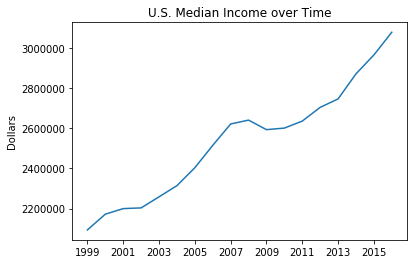

In [52]:
plt.plot(x, y);
plt.xticks(np.arange(17, step = 2));
plt.title('U.S. Median Income over Time');
plt.ylabel('Dollars');

In [98]:
total_by_year

,year,value
0,1999,2093517.0
1,2000,2171887.0
2,2001,2199550.0
3,2002,2203069.0
4,2003,2258189.0
5,2004,2313729.0
6,2005,2403031.0
7,2006,2514206.0
8,2007,2620643.0
9,2008,2639914.0


In [109]:
years = list(np.arange(2001,2017))

In [141]:
census_data = census_data.reset_index()

In [148]:
census_data = census_data[census_data['year']!='1999']

In [149]:
census_data = census_data[census_data['year']!='2000']

In [150]:
census_data = census_data[census_data['year']!='2017']

In [152]:
census_data.head()

,State,year,value
2,Alabama,2001,35160.0
3,Alabama,2002,37603.0
4,Alabama,2003,37255.0
5,Alabama,2004,36629.0
6,Alabama,2005,37150.0


In [153]:
census_data.tail()

,State,year,value
982,Wyoming,2012,57512.0
983,Wyoming,2013,55700.0
984,Wyoming,2014,55690.0
985,Wyoming,2015,60925.0
986,Wyoming,2016,57829.0


In [155]:
import pickle

In [156]:
#Save final DataFrame as pickle file

with open ('median_income.pickle', 'wb') as to_write:
    pickle.dump(census_data, to_write)